In [2]:
import numpy as np
class FiniteDifferences(object):
    def __init__(self, S0, K, r, T, sigma, Smax, M, N,is_call=True):

        self.S0 = S0
        self.K = K
        self.r = r
        self.T = T
        self.sigma = sigma
        self.Smax = Smax
        self.M, self.N = int(M), int(N) # Ensure M&N are integers
        self.is_call = is_call
        self.dS = Smax / float(self.M)
        self.dt = T / float(self.N)
        self.i_values = np.arange(self.M)
        self.j_values = np.arange(self.N)
        self.grid = np.zeros(shape=(self.M+1, self.N+1))
        self.boundary_conds = np.linspace(0, Smax, self.M+1)
    def _setup_boundary_conditions_(self):
        pass
    def _setup_coefficients_(self):
        pass
    def _traverse_grid_(self):
        """ Iterate the grid backwards in time """
        pass
    def _interpolate_(self):
        """
        Use piecewise linear interpolation on the initial
        grid column to get the closest price at S0.
        """
        return np.interp(self.S0,self.boundary_conds,self.grid[:, 0])
    def price(self):
            self._setup_boundary_conditions_()
            self._setup_coefficients_()
            self._traverse_grid_()
            return self._interpolate_()

In [3]:
""" Explicit method of Finite Differences """
class FDExplicitEu(FiniteDifferences):
    def _setup_boundary_conditions_(self):
        if self.is_call:
            self.grid[:, -1] = np.maximum(self.boundary_conds - self.K, 0)
            self.grid[-1, :-1] = (self.Smax - self.K) * \
                                    np.exp(-self.r *
                                           self.dt *
                                           (self.N-self.j_values))
        else:
            self.grid[:, -1] = \
                np.maximum(self.K-self.boundary_conds, 0)
            self.grid[0, :-1] = (self.K - self.Smax) * \
                                    np.exp(-self.r *
                                            self.dt *
                                            (self.N-self.j_values))
    def _setup_coefficients_(self):
        self.a = 0.5*self.dt*((self.sigma**2) *
                        (self.i_values**2) -
                        self.r*self.i_values)
        self.b = 1 - self.dt*((self.sigma**2) *(self.i_values**2) +
                                    self.r)
        self.c = 0.5*self.dt*((self.sigma**2) *
                                    (self.i_values**2) +
                                    self.r*self.i_values)
    def _traverse_grid_(self):
          for j in reversed(self.j_values):
            for i in range(self.M)[2:]:
                self.grid[i,j] = self.a[i]*self.grid[i-1,j+1] +\
                                 self.b[i]*self.grid[i,j+1] + \
                                 self.c[i]*self.grid[i+1,j+1]

In [115]:
option = FDExplicitEu(50, 50, 0.1, 5./12., 0.4, 100, 100, 1000, False)
print(option.grid)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [48]:
 print(option.grid[2, :-1])

[42.15945023 42.16465101 42.16985292 42.17505597 42.18026016 42.18546549
 42.19067195 42.19587956 42.2010883  42.20629819 42.21150921 42.21672138
 42.22193468 42.22714913 42.23236472 42.23758145 42.24279933 42.24801835
 42.25323851 42.25845981 42.26368227 42.26890586 42.2741306  42.27935649
 42.28458352 42.2898117  42.29504102 42.3002715  42.30550312 42.31073588
 42.3159698  42.32120487 42.32644108 42.33167845 42.33691696 42.34215663
 42.34739744 42.35263941 42.35788253 42.3631268  42.36837223 42.3736188
 42.37886654 42.38411542 42.38936546 42.39461665 42.399869   42.4051225
 42.41037716 42.41563298 42.42088995 42.42614808 42.43140737 42.43666781
 42.44192942 42.44719218 42.4524561  42.45772118 42.46298742 42.46825482
 42.47352338 42.47879311 42.48406399 42.48933604 42.49460925 42.49988362
 42.50515916 42.51043585 42.51571372 42.52099275 42.52627294 42.5315543
 42.53683682 42.54212051 42.54740537 42.55269139 42.55797858 42.56326694
 42.56855647 42.57384717 42.57913903 42.58443207 42.58

In [39]:
np.exp(-0.1*0.01*96)

0.9084640160687062

In [ ]:
 S0, K, r, T, sigma, Smax, M, N,is_call=True

In [28]:
48-47.99791667

0.0020833299999978294

In [29]:
48/47.99791667

1.0000434045922102

In [52]:
option.a[2]*47

0.004308333333333335

In [54]:
option.b[2]*48

47.9852

In [55]:
option.c[2]*47

0.008225000000000001

In [56]:
0.004308333333333335+47.9852+0.008225000000000001


47.997733333333336

In [59]:
S=np.linspace(5,15,100)

In [62]:

option1 = FDExplicitEu(S, 10, 0.05, 6./12., 0.2, 15, 100, 30, False)
print(option1.price())

(100,)


In [73]:
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
from sympy import init_printing
init_printing()
from pandas import read_csv
from matplotlib import pyplot
pyplot.style.use('seaborn-whitegrid')

In [65]:
def euro_vanilla_put(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    put = (K * np.exp(-r * T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1))
    
    return put

In [66]:
putprices=euro_vanilla_put(S, 10, 0.5, 0.05, 0.2)

In [67]:
error1=np.subtract(option1.price(),putprices)
        
    

In [88]:
#  import seaborn as sns

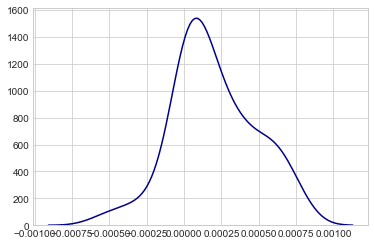

In [114]:
# sns.distplot(error3, hist=False, kde=True, 
#               bins=int(10/0.1), color = 'darkblue',
#               hist_kws={'edgecolor':'black'})

In [84]:
import pandas as pd

In [86]:
error_kde=pd.Series(error1)

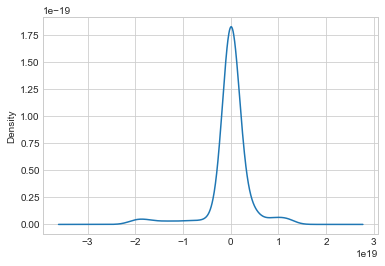

In [87]:
#ax = error_kde.plot.kde()

In [90]:
"""
Price a European option by the implicit method
of finite differences.
"""
import numpy as np
import scipy.linalg as linalg

class FDImplicitEu(FDExplicitEu):
    
    def _setup_coefficients_(self): 
        self.a = 0.5*(self.r*self.dt*self.i_values -
                (self.sigma**2)*self.dt*(self.i_values**2))
        self.b = 1 + \
                (self.sigma**2)*self.dt*(self.i_values**2) + \
                    self.r*self.dt
        self.c = -0.5*(self.r * self.dt*self.i_values +
                (self.sigma**2)*self.dt*(self.i_values**2))
        self.coeffs = np.diag(self.a[2:self.M], -1) + \
                    np.diag(self.b[1:self.M]) + \
                    np.diag(self.c[1:self.M-1], 1)
    def _traverse_grid_(self):
    #""" Solve using linear systems of equations """
        P, L, U = linalg.lu(self.coeffs)
        aux = np.zeros(self.M-1)
        for j in reversed(range(self.N)):
            aux[0] = np.dot(-self.a[1], self.grid[0, j])
            x1 = linalg.solve(L, self.grid[1:self.M, j+1]+aux)
            x2 = linalg.solve(U, x1)
            self.grid[1:self.M, j] = x2

In [91]:
option_im = FDImplicitEu(S, 10, 0.05, 6./12., 0.2, 15, 100, 30, False)
error2=np.subtract(option_im.price(),putprices)

In [93]:
error2_kde=pd.Series(error2)

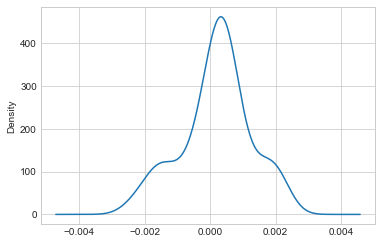

In [94]:
ax = error2_kde.plot.kde()

In [95]:
""" Crank-Nicolson method of Finite Differences """
class FDCnEu(FDExplicitEu):
    def _setup_coefficients_(self):
        self.alpha = 0.25*self.dt*(
            (self.sigma**2)*(self.i_values**2) -
            self.r*self.i_values)
        self.beta = -self.dt*0.5*(
                    (self.sigma**2)*(self.i_values**2) +
                        self.r)
        self.gamma = 0.25*self.dt*(
            (self.sigma**2)*(self.i_values**2) +
                self.r*self.i_values)
        self.M1 = -np.diag(self.alpha[2:self.M], -1) + \
                np.diag(1-self.beta[1:self.M]) - \
                np.diag(self.gamma[1:self.M-1], 1)
        self.M2 = np.diag(self.alpha[2:self.M], -1) + \
                np.diag(1+self.beta[1:self.M]) + \
                np.diag(self.gamma[1:self.M-1], 1)
    def _traverse_grid_(self):
        
        """ Solve using linear systems of equations """
        P, L, U = linalg.lu(self.M1)
        for j in reversed(range(self.N)):
            x1 = linalg.solve(L,
                np.dot(self.M2,
                self.grid[1:self.M, j+1]))
            x2 = linalg.solve(U, x1)
            self.grid[1:self.M, j] = x2

In [99]:
option_cn = FDCnEu(S, 10, 0.05, 6./12., 0.2, 15, 100, 30, False)
error3=np.subtract(option_cn.price(),putprices)
option_cn.price()

array([4.75309956e+00, 4.65208979e+00, 4.55108048e+00, 4.45007171e+00,
       4.34906351e+00, 4.24805739e+00, 4.14705368e+00, 4.04605249e+00,
       3.94505906e+00, 3.84407458e+00, 3.74309917e+00, 3.64214803e+00,
       3.54122498e+00, 3.44032918e+00, 3.33949811e+00, 3.23874246e+00,
       3.13805673e+00, 3.03752013e+00, 2.93715964e+00, 2.83695454e+00,
       2.73705044e+00, 2.63750863e+00, 2.53827042e+00, 2.43957111e+00,
       2.34153653e+00, 2.24403017e+00, 2.14738944e+00, 2.05184864e+00,
       1.95713588e+00, 1.86368351e+00, 1.77188897e+00, 1.68127622e+00,
       1.59234240e+00, 1.50570519e+00, 1.42061791e+00, 1.33759364e+00,
       1.25751726e+00, 1.17932431e+00, 1.10348702e+00, 1.03118111e+00,
       9.61011406e-01, 8.93357697e-01, 8.29677632e-01, 7.68273902e-01,
       7.09398319e-01, 6.54747029e-01, 6.02387937e-01, 5.52431070e-01,
       5.06738816e-01, 4.63239080e-01, 4.21927972e-01, 3.84683447e-01,
       3.49460680e-01, 3.16232314e-01, 2.86537552e-01, 2.58721488e-01,
      

In [100]:
putprices

array([4.75309934e+00, 4.65208948e+00, 4.55107983e+00, 4.45007059e+00,
       4.34906204e+00, 4.24805469e+00, 4.14704932e+00, 4.04604717e+00,
       3.94505011e+00, 3.84406091e+00, 3.74308357e+00, 3.64212376e+00,
       3.54118934e+00, 3.44029100e+00, 3.33944292e+00, 3.23866368e+00,
       3.13797709e+00, 3.03741317e+00, 2.93700912e+00, 2.83681030e+00,
       2.73687115e+00, 2.63725600e+00, 2.53803971e+00, 2.43930819e+00,
       2.34115857e+00, 2.24369919e+00, 2.14704919e+00, 2.05133788e+00,
       1.95670369e+00, 1.86329286e+00, 1.77125781e+00, 1.68075528e+00,
       1.59194426e+00, 1.50498372e+00, 1.42003032e+00, 1.33723605e+00,
       1.25674595e+00, 1.17869587e+00, 1.10321051e+00, 1.03040157e+00,
       9.60366209e-01, 8.93185805e-01, 8.28925024e-01, 7.67631209e-01,
       7.09334111e-01, 6.54045929e-01, 6.01761658e-01, 5.52459710e-01,
       5.06102782e-01, 4.62638931e-01, 4.22002820e-01, 3.84117091e-01,
       3.48893845e-01, 3.16236153e-01, 2.86039608e-01, 2.58193848e-01,
      

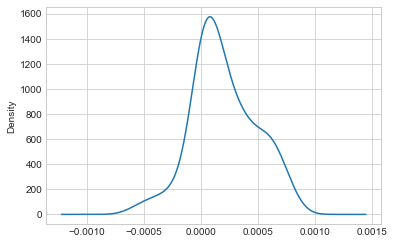

In [97]:
error3_kde=pd.Series(error3)
ax = error3_kde.plot.kde()

In [111]:
option1.price()

array([ 4.75299747e+00,  4.65198737e+00,  4.55097727e+00,  4.44996717e+00,
        4.34898643e+00,  4.24871053e+00,  4.12986822e+00,  4.05441942e+00,
        4.75326329e+00, -3.05648301e+00,  2.70034920e+00,  1.84880464e+02,
       -9.44045261e+02, -4.12258117e+02,  1.67263998e+04, -5.68872245e+04,
       -4.79986595e+04,  6.56258285e+05, -9.57190556e+05, -3.05194200e+06,
       -2.44116637e+06,  7.56971779e+07, -1.22748136e+08, -1.41682496e+09,
        5.83068517e+09, -3.28352904e+09, -7.07217756e+10,  2.05594854e+11,
       -5.89546713e+10, -1.98584034e+12,  4.60985858e+12, -6.83062965e+11,
       -3.73292908e+13,  7.20806293e+13, -4.16525247e+12, -5.00942576e+14,
        8.20242749e+14,  8.49472133e+12, -4.95996403e+15,  6.95860928e+15,
        4.62185074e+14, -3.69482756e+16,  4.46664673e+16,  5.14295442e+15,
       -2.09616112e+17,  2.18926551e+17,  3.48107307e+16, -9.12465165e+17,
        8.23653886e+17,  1.64270241e+17, -3.01688084e+18,  2.38369222e+18,
        5.65730522e+17, -

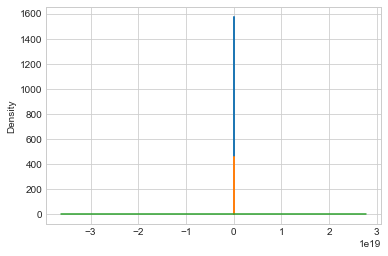

In [98]:
ax = error3_kde.plot.kde()
ax = error2_kde.plot.kde()
ax = error_kde.plot.kde()


<function matplotlib.pyplot.show(*args, **kw)>

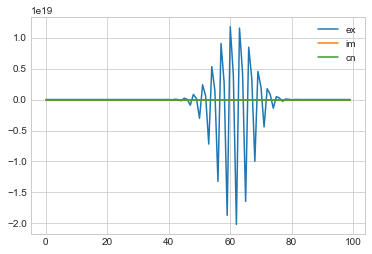

In [122]:
pyplot.plot(error1,label='ex')
pyplot.plot(error2,label='im')
pyplot.plot(error3,label='cn')
pyplot.legend()
pyplot.show
